This notebook looks at four aspects of the dataset:
1. the distribution of labels in each subset (growth phase) of the dataset
2. the shape of the data grouped by bacteria species and growth phase
3. the shape of the data grouped by 'gram-ness' (whether a given bacteria sample is gram-positive or gram-negative) and growth phase
3. the differences between the 16ms integration time data and 32ms integration time data.

The main takeaways from the exploratory data analysis are that:
1. there is imbalance in class labels; in some cases only there are only three instances of the minority class, while there are 12 instances of the majority class
2. grouping bacteria samples by gram-ness helps reduce the class imbalance issue
3. there is no obvious way to separate bacteria samples by species
4. when looking at the data for the log growth phase grouped by gram-ness, there is a clear separation between gram-positive and gram-negative bacteria
5. the differences between the 16ms and 32ms datasets are minimal.

In [1]:
import os

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import Grid
import numpy as np
import pandas as pd

%matplotlib inline

plt.style.use('seaborn')

In [2]:
os.getcwd()

'/home/anthony/bacteria-project'

In [3]:
os.listdir('data')

['Classific.py',
 'graphs.pdf',
 'growth_stages.csv',
 '16ms_32ms_growth_phase_spectra.csv',
 'bacteria_32ms.csv',
 'PC6allwavelengths.png',
 'bacteria_16ms.csv',
 'wavelengths.csv',
 '16_ms_lag_codes.csv',
 'bacteria.csv']

In [4]:
df_16ms = pd.read_csv('data/bacteria_16ms.csv', index_col=[0], header=[0, 1, 2, 3])
df_32ms = pd.read_csv('data/bacteria_32ms.csv', index_col=[0], header=[0, 1, 2, 3])
wavelengths_df = pd.read_csv('data/wavelengths.csv', index_col=[0], header=None)

In [5]:
df_16ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1042
Columns: 135 entries, (lag, positive, bc, 01) to (stat, negative, se, 07)
dtypes: float64(135)
memory usage: 1.1 MB


In [6]:
df_16ms.describe()

growth_phase          lag                                                      \
gramness         positive                                                       
species                bc                                                       
replicate              01           02           03           04           05   
count         1043.000000  1043.000000  1043.000000  1043.000000  1043.000000   
mean           340.917966   218.282554   410.265450   402.411758   147.930946   
std            517.453981   328.263253   632.792734   584.358827   213.381498   
min             -3.510400    -2.800760    -2.581292    -2.554170    -2.985820   
25%              3.738191     2.116139     3.614560     4.258268     3.017208   
50%             40.780240    27.023980    48.616896    58.972290    24.396270   
75%            496.754350   319.173550   571.801010   629.260350   223.730650   
max           1649.755000  1044.867000  2050.509445  1755.384000   670.982500   

growth_phase                                                                   \
gramness                                                                        
species                                                                         
replicate              06           07           08           09           10   
count         1043.000000  1043.000000  1043.000000  1043.000000  1043.000000   
mean           304.443366   690.243351   615.625463   508.217097   267.395909   
std            457.365956  1076.320701  1006.404767   829.675942   411.266389   
min             -3.429370    -2.280780    -4.327390    -3.340390   -24.324100   
25%              3.429760     4.382186     3.291279     3.093110    -1.435505   
50%             37.316280    78.138510    46.407810    41.594080    26.498390   
75%            446.739200   940.880800   775.154550   630.964700   401.714900   
max           1426.308000  3542.053000  3369.752000  2848.575000  1316.226000   

growth_phase     ...              stat                                         \
gramness         ...          positive                               negative   
species          ...                sa                                     se   
replicate        ...                06           07           08           01   
count            ...       1043.000000  1043.000000  1043.000000  1043.000000   
mean             ...       1319.282527  1617.105057  1424.455291   332.375709   
std              ...       2183.988762  2683.151537  2381.357464   525.271213   
min              ...        -18.529200    -2.563420    -1.462970    -2.361310   
25%              ...         11.080080    12.687795    10.883005     2.919165   
50%              ...        107.911900   130.242300   104.561900    33.991250   
75%              ...       1577.928000  1936.329500  1679.898000   436.948300   
max              ...       7512.713000  9235.687000  8223.580000  1713.175000   

growth_phase                                                                   \
gramness                                                                        
species                                                                         
replicate              02           03           04           05           06   
count         1043.000000  1043.000000  1043.000000  1043.000000  1043.000000   
mean           464.757981   346.619581   591.019431   944.666722   683.460369   
std            783.676339   589.041597  1030.124114  1631.945511  1174.686894   
min             -3.337340    -2.003951    -2.814100    -3.369360    -3.098660   
25%              3.433975     2.271594     7.036556     5.055340     3.809488   
50%             34.734540    22.254616    41.866360    52.880860    42.561820   
75%            533.983350   395.229638   603.002400  1030.629000   753.640300   
max           2670.119000  2010.552740  3632.655000  5669.533000  4091.082000   

growth_phase               
gramness                   
species                    
replicate              0

In [7]:
df_16ms.head()

growth_phase       lag                                                    \
gramness      positive                                                     
species             bc                                                     
replicate           01        02        03        04        05        06   
0             0.000000  0.622353  0.064528 -1.094650 -1.492810 -0.979760   
1             1.560060 -2.115990  0.645279 -2.554170 -0.559800 -0.061230   
2             0.715025  0.062234 -1.032450 -0.912210  2.923387  0.489875   
3            -0.520060  2.178335 -2.064991  0.851433  3.047967 -1.530940   
4             0.130014  1.867163 -1.419711  3.709871  2.985793  0.000003   

growth_phase                                            ...         stat  \
gramness                                                ...     positive   
species                                                 ...           sa   
replicate           07        08        09        10    ...           06   
0            -0.240070  0.060945  0.247423  2.628512    ...     1.757536   
1             0.600163 -0.792280  0.123709  0.292028    ...    -2.071090   
2             0.540146  0.182837 -0.742270 -0.408840    ...    -2.071340   
3            -1.200400  0.853271  1.360885 -5.741500    ...     3.714417   
4             1.260425 -3.047420  2.226921  4.453517    ...    -2.644110   

growth_phase                                                              \
gramness                          negative                                 
species                                 se                                 
replicate           07        08        01        02        03        04   
0            -0.525800 -0.182860  0.918231  1.283523 -0.734724  0.183516   
1            -0.328620 -0.853340 -0.655870  0.192528 -1.269057 -1.345770   
2            -0.985860 -0.182860  0.393521  1.219347 -1.669815  0.367029   
3             1.117374  2.255372 -1.180630 -3.337340 -0.667963  1.590540   
4             0.591557  0.975300  1.246246  1.604498  0.868363  0.917630   

growth_phase                                
gramness                                    
species                                     
replicate           05        06        07  
0             2.187136 -0.774600  0.423758  
1            -1.004900 -0.193650  1.089653  
2            -3.369360 -1.032800 -0.363220  
3            -1.477880 -0.645540 -1.574020  
4            -0.886730  1.420193 -1.816200  

[5 rows x 135 columns]

In [8]:
df_32ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1042
Columns: 135 entries, (lag, positive, bc, 01) to (stat, negative, se, 07)
dtypes: float64(135)
memory usage: 1.1 MB


In [9]:
df_32ms.describe()

growth_phase          lag                                                      \
gramness         positive                                                       
species                bc                                                       
replicate              01           02           03           04           05   
count         1043.000000  1043.000000  1043.000000  1043.000000  1043.000000   
mean           463.254155   316.392618   552.623759   465.022246   175.743983   
std            699.283252   476.657170   854.591596   685.749253   258.675914   
min             -2.730370    -2.282100    -2.022019    -1.540730    -1.990560   
25%              4.421786     3.921701     5.100123     4.968519     2.882823   
50%             60.336290    42.483700    62.138347    63.970220    25.816110   
75%            671.629550   460.699250   761.548722   717.397750   264.806850   
max           2172.793000  1514.490000  2750.493031  2088.023000   815.180300   

growth_phase                                                                   \
gramness                                                                        
species                                                                         
replicate              06           07           08           09           10   
count         1043.000000  1043.000000  1043.000000  1043.000000  1043.000000   
mean           413.784704   844.072374   851.591885   646.697807   366.611195   
std            621.866857  1331.090054  1392.304143  1067.856167   554.603005   
min             -1.673860    -1.000280    -1.259630    -1.690850   -11.798100   
25%              4.043047     5.603591     4.673629     2.309737     2.812726   
50%             50.922750    84.657250    64.188980    43.552670    41.949670   
75%            612.134250  1131.572500  1075.584000   800.763400   543.530450   
max           1930.534000  4408.011000  4658.405000  3643.471000  1765.544000   

growth_phase     ...              stat                              \
gramness         ...          positive                               
species          ...                sa                               
replicate        ...                06            07            08   
count            ...       1043.000000   1043.000000   1043.000000   
mean             ...       1599.289495   1902.815892   1755.026657   
std              ...       2653.006792   3166.968570   2929.745473   
min              ...        -11.208600     -1.796640     -0.447010   
25%              ...         11.004515     11.811570     10.710685   
50%              ...        129.346400    145.233800    130.134800   
75%              ...       1908.102500   2265.020500   2097.588000   
max              ...       9130.342000  10880.640000  10086.280000   

growth_phase                                                                   \
gramness         negative                                                       
species                se                                                       
replicate              01           02           03           04           05   
count         1043.000000  1043.000000  1043.000000  1043.000000  1043.000000   
mean           446.366505   590.585346   419.127158   793.937742  1199.566248   
std            705.206690   999.239678   713.758593  1383.551956  2065.302325   
min             -2.404990    -1.283620    -2.003949    -1.182740    -1.930980   
25%              4.176833     3.209773     2.093012     7.383646     5.480067   
50%             48.709410    37.814460    24.332918    55.684650    68.544360   
75%            593.165750   676.059400   474.192789   817.292200  1327.228000   
max           2307.586000  3394.480000  2433.270406  4896.256000  7163.583000   

growth_phase                            
gramness                                
species                                 
replicate              06           07  
count         1043.000000  1043.000000  
mean           810.087409  1064.991

In [10]:
df_32ms.head()

growth_phase       lag                                                    \
gramness      positive                                                     
species             bc                                                     
replicate           01        02        03        04        05        06   
0            -0.086670 -0.456390  0.516225 -1.540620  0.456133 -1.183870   
1             0.996705 -0.165960 -0.043018 -1.054100  0.663466  0.612345   
2             0.650022 -0.746820 -0.731316 -0.648680  0.995199 -0.204110   
3            -0.346710  0.622385  0.817394 -0.202730  1.327006  0.285776   
4             1.993549  1.078807 -0.860428  0.243273  0.248810  0.449092   

growth_phase                                            ...         stat  \
gramness                                                ...     positive   
species                                                 ...           sa   
replicate           07        08        09        10    ...           06   
0             0.800218  0.487562  0.494845  3.310051    ...     1.046171   
1             0.040013  0.162518  0.329893  1.829989    ...    -2.803270   
2            -0.440120 -1.097000  0.288661  0.973460    ...     0.000002   
3             1.000333  0.203161  0.329910 -2.733980    ...     6.001085   
4             1.000333 -1.097080  0.659837  4.844247    ...    -2.476320   

growth_phase                                                              \
gramness                          negative                                 
species                                 se                                 
replicate           07        08        01        02        03        04   
0            -0.219080 -0.000002  0.655876 -1.283520 -0.578877 -0.489380   
1            -0.744870  0.893972 -1.093120 -0.385060 -0.222642  0.448589   
2            -0.394340  1.178423 -0.349810 -0.385060  0.133583  0.163123   
3             2.059493  1.341045 -0.087450 -1.069670  0.311717  0.122343   
4             0.438183  0.934681  1.005742  1.839845  0.534377 -0.203920   

growth_phase                                
gramness                                    
species                                     
replicate           05        06        07  
0            -0.394080 -0.731570  0.080716  
1             0.157629  0.559429  0.121073  
2            -1.930980 -0.516400 -0.847510  
3             1.418768  0.086071  0.403608  
4            -0.472910  0.903758 -0.201800  

[5 rows x 135 columns]

In [11]:
wavelengths_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1042
Data columns (total 1 columns):
1    1043 non-null float64
dtypes: float64(1)
memory usage: 16.3 KB


In [12]:
wavelengths_df.describe()

,1
count,1043.000000
mean,594.306442
std,112.580390
min,395.494100
25%,497.482200
50%,596.374400
75%,692.170600
max,784.870900


In [13]:
wavelengths_df.head()

,1
0,
0,395.4941
1,395.8915
2,396.2889
3,396.6863
4,397.0836


In [14]:
growth_phases = df_16ms.columns.levels[0]
print(growth_phases)

Index(['lag', 'log', 'stat'], dtype='object', name='growth_phase')


In [15]:
species = df_16ms.columns.levels[2]
print(species)

Index(['bc', 'ec', 'lm', 'pa', 'sa', 'se'], dtype='object', name='species')


In [16]:
gram_pos = ['bc', 'lm', 'sa']
gram_neg = ['ec', 'pa', 'se']

# Class Balance

In [17]:
def plot_label_distribution(label):
    dfs = [df_16ms[growth_phase].T for growth_phase in growth_phases]
    df = pd.concat(dfs, axis=1)
    df = df.dropna(axis=0)
    
    label_counts_df = df.reset_index()[label.lower()].value_counts().sort_index()

    ax = label_counts_df.plot(kind='bar')
    ax.set(xlabel=label.capitalize(),
           ylabel='Count',
           title='Distribution of Labels in Dataset')

In [18]:
def plot_label_distribution_by_growth_phase(label, category_names):
    df = pd.concat([df_16ms[growth_phase] for growth_phase in growth_phases], 
               names=['growth_phase'], 
               keys=growth_phases, 
               axis=1)
    df = df.T
    df = df.dropna(axis=0)
    df = df.reset_index()

    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    subplot_i = 0

    # Select data. #
    lag = df['growth_phase'] == 'lag'
    log = df['growth_phase'] == 'log'
    stat = df['growth_phase'] == 'stat'

    df_lag = df[lag][label].value_counts().sort_index()
    df_log = df[log][label].value_counts().sort_index()
    df_stat = df[stat][label].value_counts().sort_index()

    # Create bar plots. #
    width = 0.25
    idx = np.arange(len(df_lag))

    lag_barplot = ax.bar(x=idx, height=df_lag, width=width)
    log_barplot = ax.bar(x=idx + width, height=df_log, width=width)
    stat_barplot = ax.bar(x=idx + 2 * width, height=df_stat, width=width)

    # Add legend to the right of the plot. #
    ax.legend((lag_barplot[0], log_barplot[0], stat_barplot[0]),
              ('Lag', 'Log', 'Stat'),
              title='Growth Phase',
              bbox_to_anchor=(1, 0.5),
              fancybox=True,
              shadow=True)

    # Add labels to plot. #
    ax.set(title='Distribution of Labels in Dataset by Growth Phase',
           xticks=idx + width,
           xticklabels=category_names,
           xlabel='Bacteria %s' % label.capitalize(),
           ylabel='Count')

    # Attach a text label above each bar displaying its height. #
    for barplot in [lag_barplot, log_barplot, stat_barplot]:
        for bar in barplot:
            height = bar.get_height()
            ax.text(bar.get_x(), height, '%d' % int(height),
                    ha='left', va='bottom')

    ax.autoscale_view()

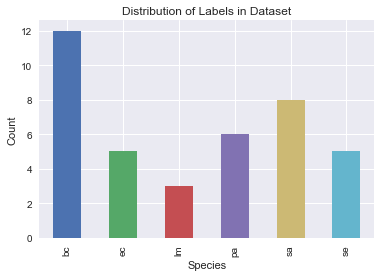

In [19]:
plot_label_distribution('species')

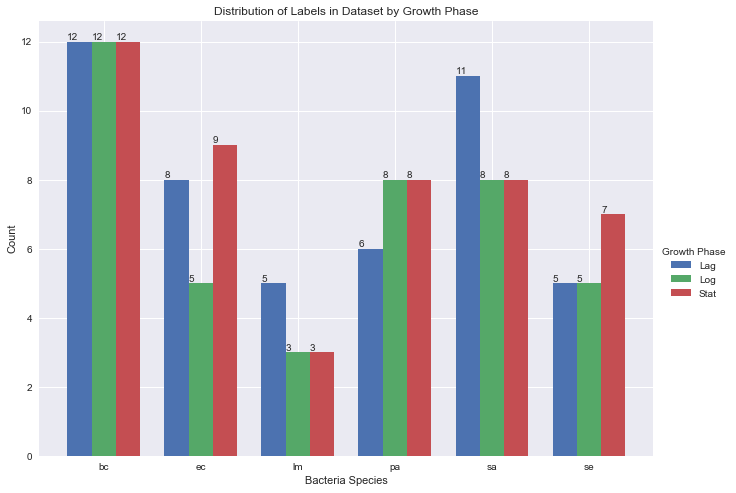

In [20]:
plot_label_distribution_by_growth_phase('species', species)

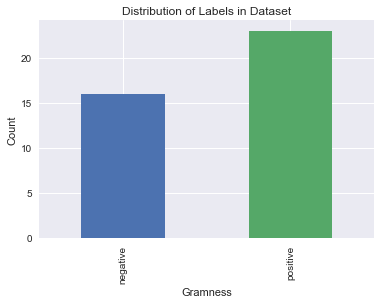

In [21]:
plot_label_distribution('gramness')

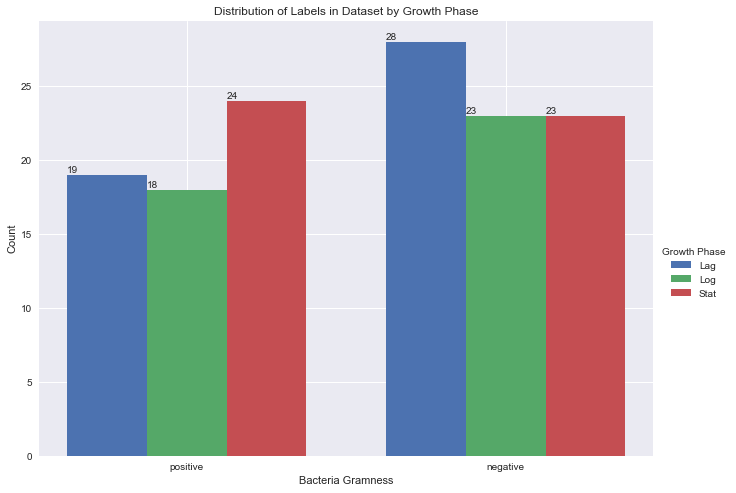

In [22]:
plot_label_distribution_by_growth_phase('gramness', ['positive', 'negative']) 

# Plot Comparisons by Growth Phase

In [23]:
def plot_growth_phases(df, integration_time):
    """
    Plot the fluorescence spectra for each species and growth phase.
    
    Arguments:
        df: The dataframe with the fluorescence spectra data.
        integration_time: The integration time used for the readings in the given dataframe.
    """
    fig = plt.figure(figsize=(16, 22))

    grid = Grid(fig, rect=111, nrows_ncols=(len(species), len(growth_phases)),
                axes_pad=0.25, label_mode='L', 
                share_y=True)
    
    y_min = df.unstack().min() * 1.1
    y_max = df.unstack().max() * 1.1
    ylim = (y_min, y_max)
    
    growth_phase_i = 0
    species_i = 0
    
    for grid_axis in grid:
        growth_phase = growth_phases[growth_phase_i]
        s = species[species_i]
        gramness = 'positive' if s in gram_pos else 'negative'
        
        df_axis = df.loc(axis=1)[growth_phase, gramness, s].plot(ax=grid_axis, ylim=ylim)
        df_axis.set(xlabel='Wavelength', 
                    ylabel='Flourescence Spectra for Species %s' % s)
        
        if species_i == 0:  # i.e. we are on the first row
            df_axis.set(title='%s' % growth_phase.capitalize())
        
        growth_phase_i += 1
        
        if growth_phase_i == len(growth_phases):
            growth_phase_i = 0
            species_i += 1

    fig.suptitle('%s Flourescence Spectra at Each Growth Phase by Species' % integration_time)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [24]:
def shade_std(data, ax, color='gray', alpha=0.3, n_deviations=0):
    """Shade the area covered by n standard deviations, minus the area covered by (n - 1) standard deviations.
    
    Arguments:
        data: the data to plot.
        ax: the Axis object to plot on.
        color: the color to shade with.
        alpha: the alpha of the shaded area.
        n_deviations: the number of standard deviations to shade.
    """
    assert n_deviations >= 0
    
    mean = data.mean(axis=1)
    std = data.std(axis=1)
    
    std_low_prev = (mean - (n_deviations - 1) * std).clip(lower=0)
    std_high_prev = (mean + (n_deviations - 1) * std).clip(lower=0)
    std_low = (mean - n_deviations * std).clip(lower=0)
    std_high = (mean + n_deviations * std).clip(lower=0)

    ax.fill_between(std.index, std_low_prev, std_low, 
                    facecolor=color, 
                    alpha=alpha
                   )
    ax.fill_between(std.index, std_high_prev, std_high, 
                    facecolor=color, 
                    label='$\pm %d \sigma$' % n_deviations, 
                    alpha=alpha
                   )

In [25]:
def plot_gramness_stats(df, integration_time, shading_alpha=0.3, shading_colors=('blue', 'orange', 'red')):
    """Plot μ and a shaded area for ±3σ of the fluorescence spectra.
    
    Arguments:
        df: The dataframe to plot.
        integration_time: The integration time used for the readings in the given dataframe.
        shading_alpha: The alpha of the shaded standard deviations.
        shading_colors: The colors to use for shading the standard deviations.
    """
                            
    assert len(shading_colors) == 3
    
    gramness = ['negative', 'positive']
    
    fig = plt.figure(figsize=(16, 11))

    grid = Grid(fig, rect=111, nrows_ncols=(len(gramness), len(growth_phases)),
                axes_pad=0.25, label_mode='L', 
                share_y=True)
    
    y_min = 0
    
    per_gramness_mean = df.groupby(level=[0, 1], axis=1).mean()
    per_gramness_std = df.groupby(level=[0, 1], axis=1).std()
    
    y_max = (per_gramness_mean + 3 * per_gramness_std).unstack().max()
    y_lim = (y_min, y_max * 1.1)
    
    growth_phase_i = 0
    gramness_i = 0

    for grid_axis in grid:
        growth_phase = growth_phases[growth_phase_i]
        gram = gramness[gramness_i]
        
        grid_df = df[growth_phase, gram]
        
        mean = grid_df.mean(axis=1)
        
        grid_axis.set(ylim=y_lim)
        
        shade_std(grid_df, grid_axis, color=shading_colors[0], n_deviations=1)
        shade_std(grid_df, grid_axis, color=shading_colors[1], n_deviations=2)
        shade_std(grid_df, grid_axis, color=shading_colors[2], n_deviations=3)
        
        df_axis = mean.plot(ax=grid_axis, style='-k', label='mean')
        
        df_axis.set(xlabel='Wavelength', 
                    ylabel='Flourescence Spectra for %s Gramness' % gram.capitalize())
        
        if gramness_i == 0: # i.e. we are in the first row
            df_axis.set(title='%s' % growth_phase.capitalize())
        
        df_axis.legend()
        
        growth_phase_i += 1
        
        if growth_phase_i == len(growth_phases):
            growth_phase_i = 0
            gramness_i += 1

    fig.suptitle('%s Flourescence Spectra at Each Growth Phase by Gramness' % integration_time)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

/home/anthony/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: PerformanceWarning: indexing past lexsort depth may impact performance.
/home/anthony/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2845: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


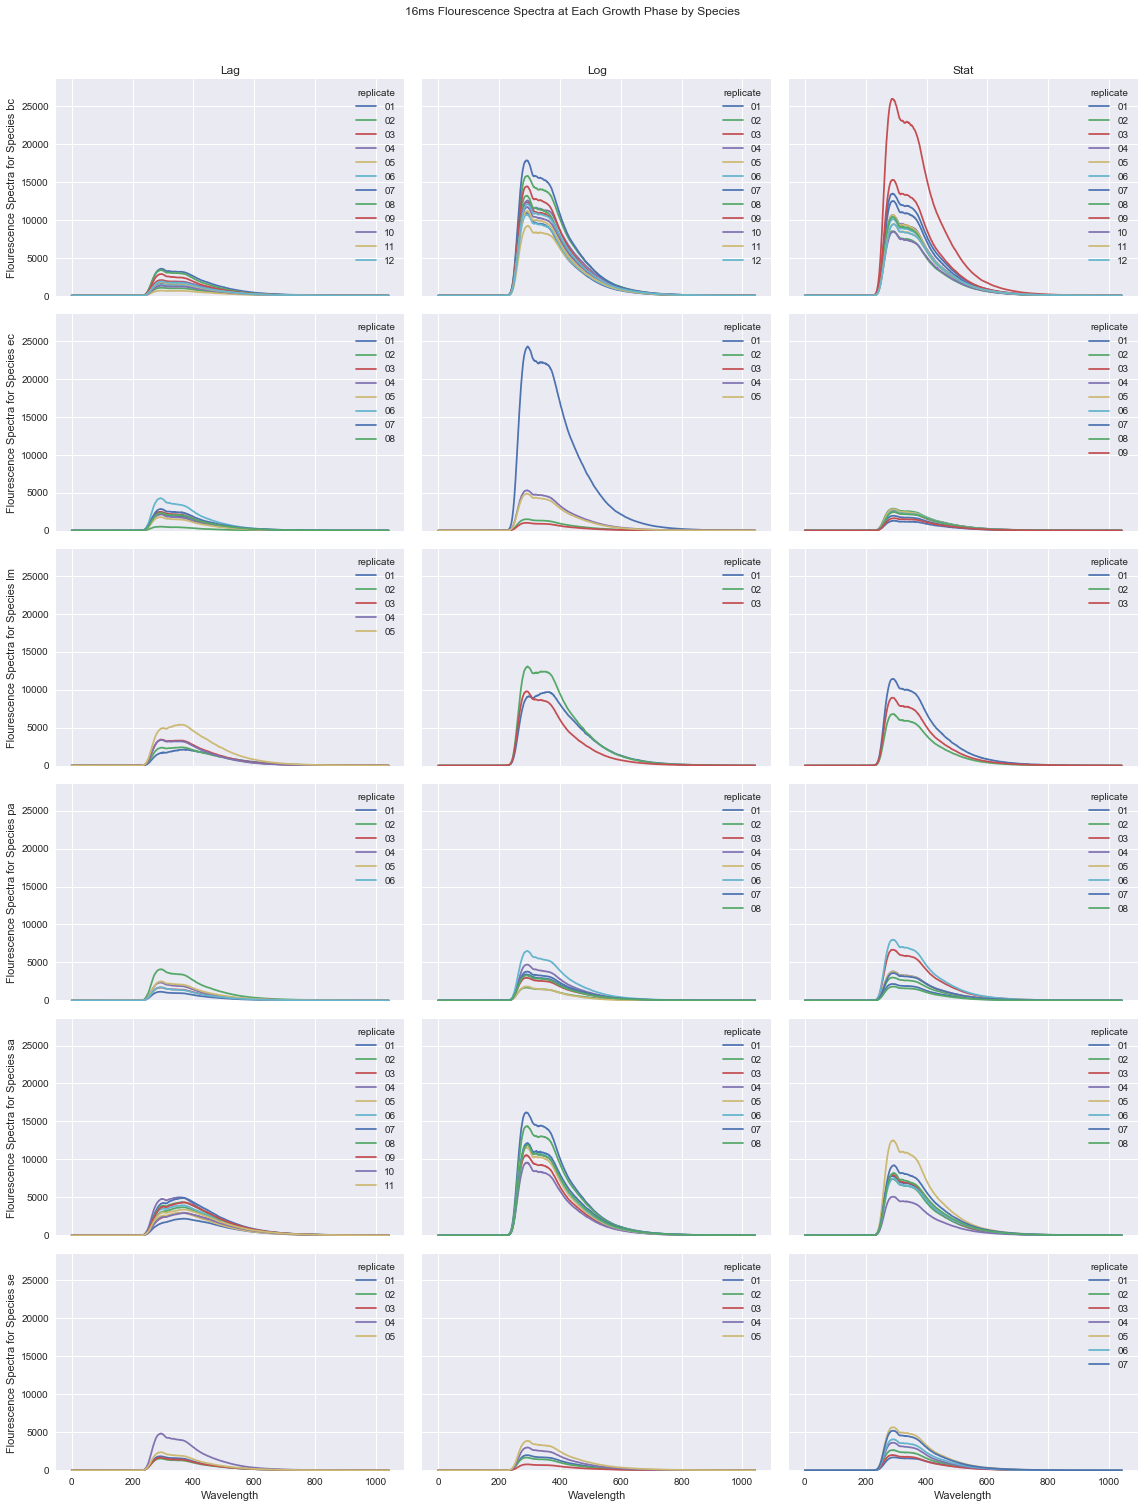

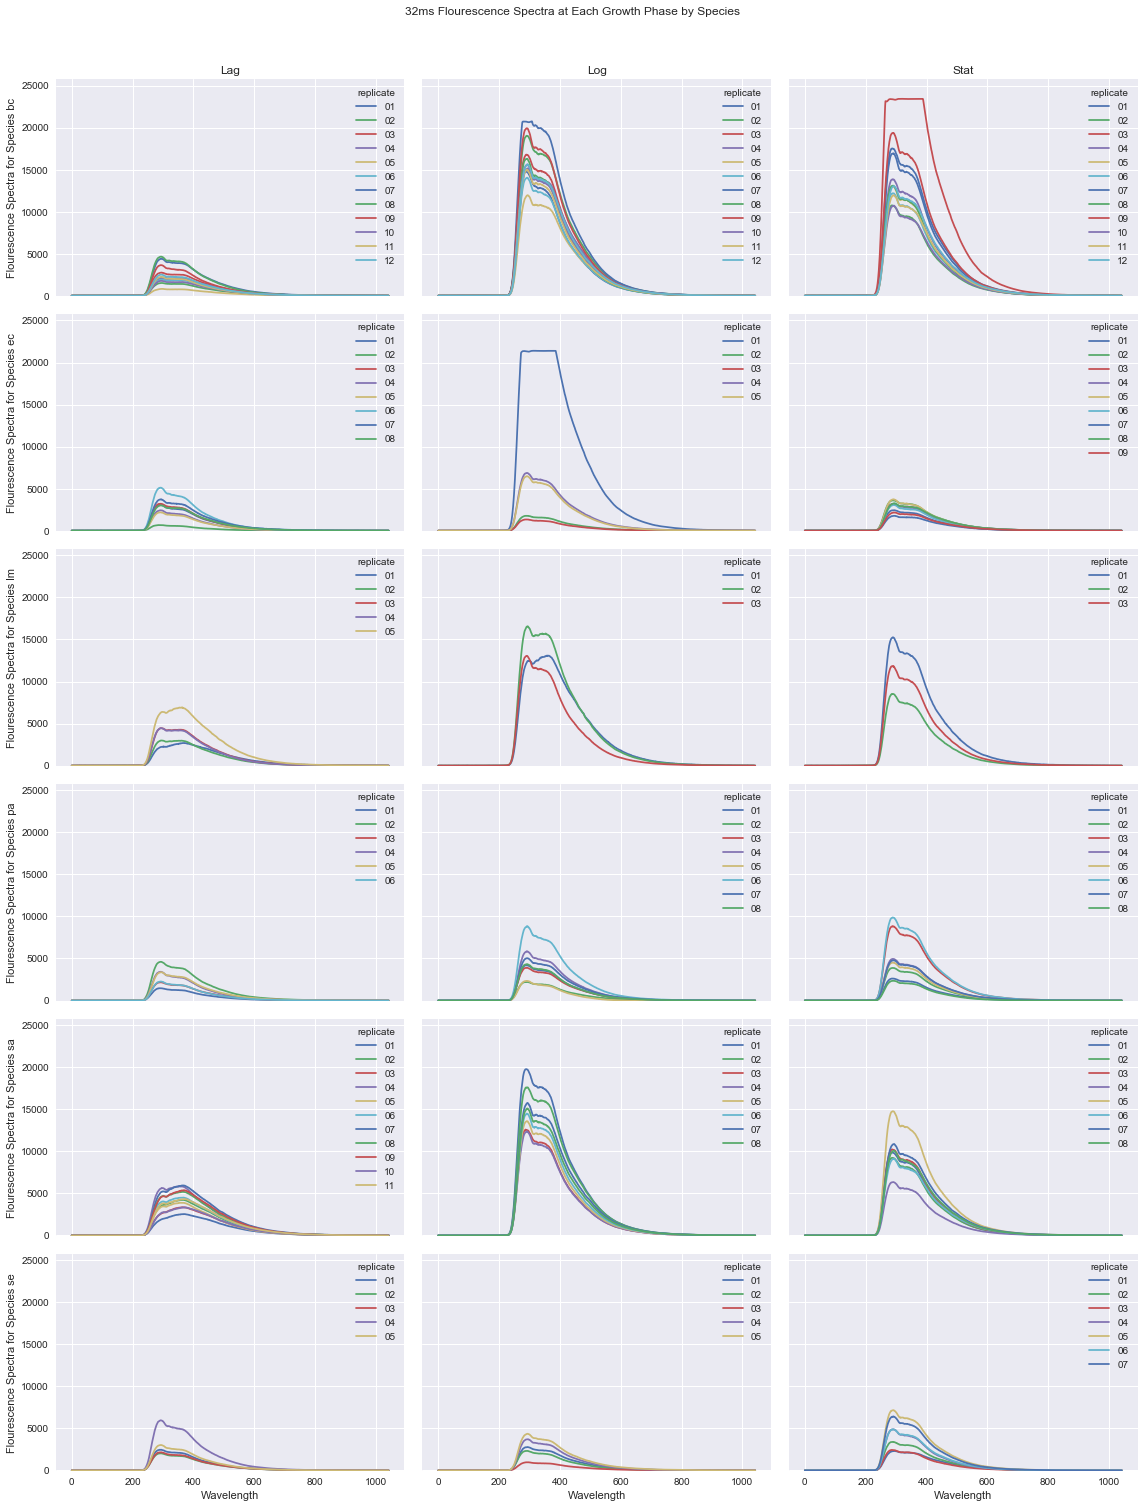

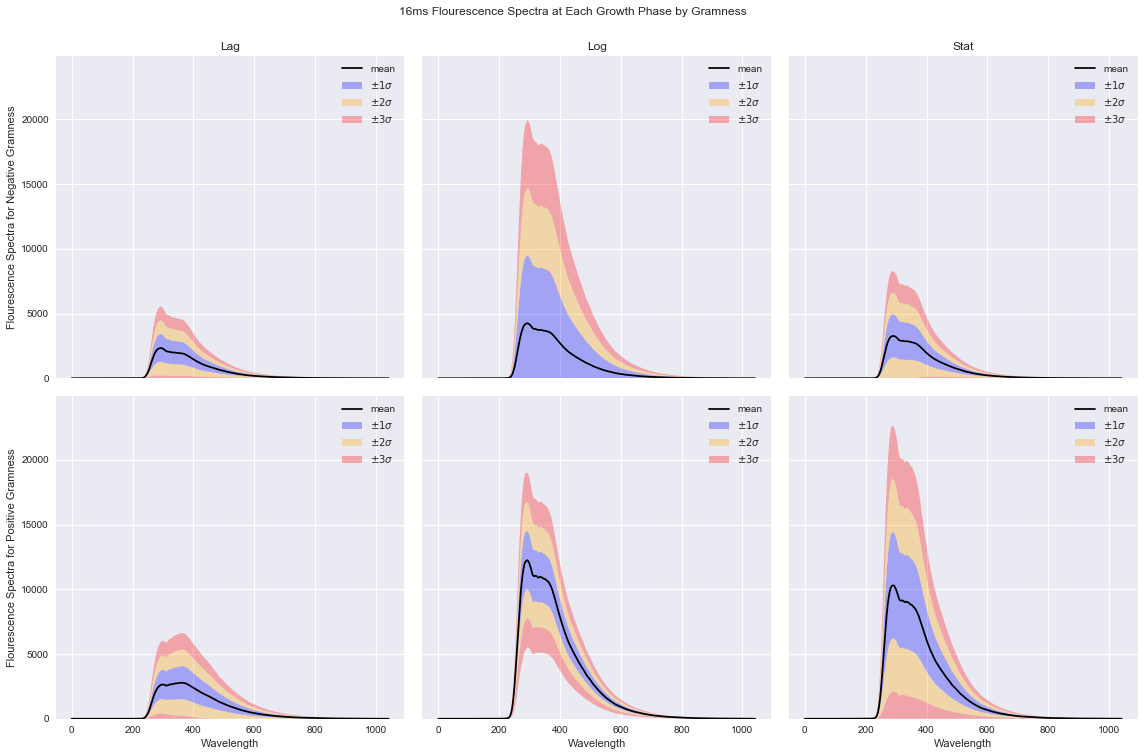

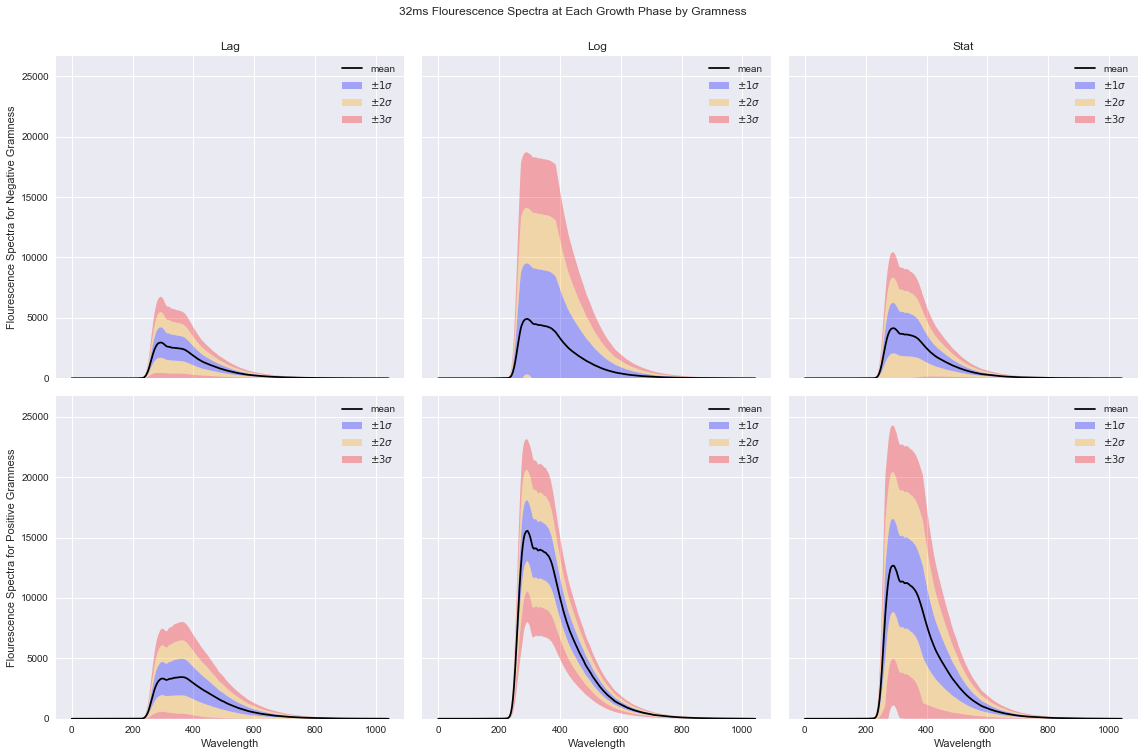

In [26]:
from matplotlib.backends.backend_pdf import PdfPages

# These plots are large and a best viewed side-by-side when comparing.

with PdfPages('comparisons_plots.pdf') as pdf: 
    plot_growth_phases(df_16ms, '16ms')
    pdf.savefig()
    
    plot_growth_phases(df_32ms, '32ms')
    pdf.savefig()
    
    plot_gramness_stats(df_16ms, '16ms')
    pdf.savefig()
    
    plot_gramness_stats(df_32ms, '32ms')
    pdf.savefig()

Looking at the data on a per species basis does not seem to provide an obvious separation. However, looking at the data when separated into gram positive and gram negative indicates that the data is likely to be seperable at the log growth phase.

/home/anthony/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: PerformanceWarning: indexing past lexsort depth may impact performance.


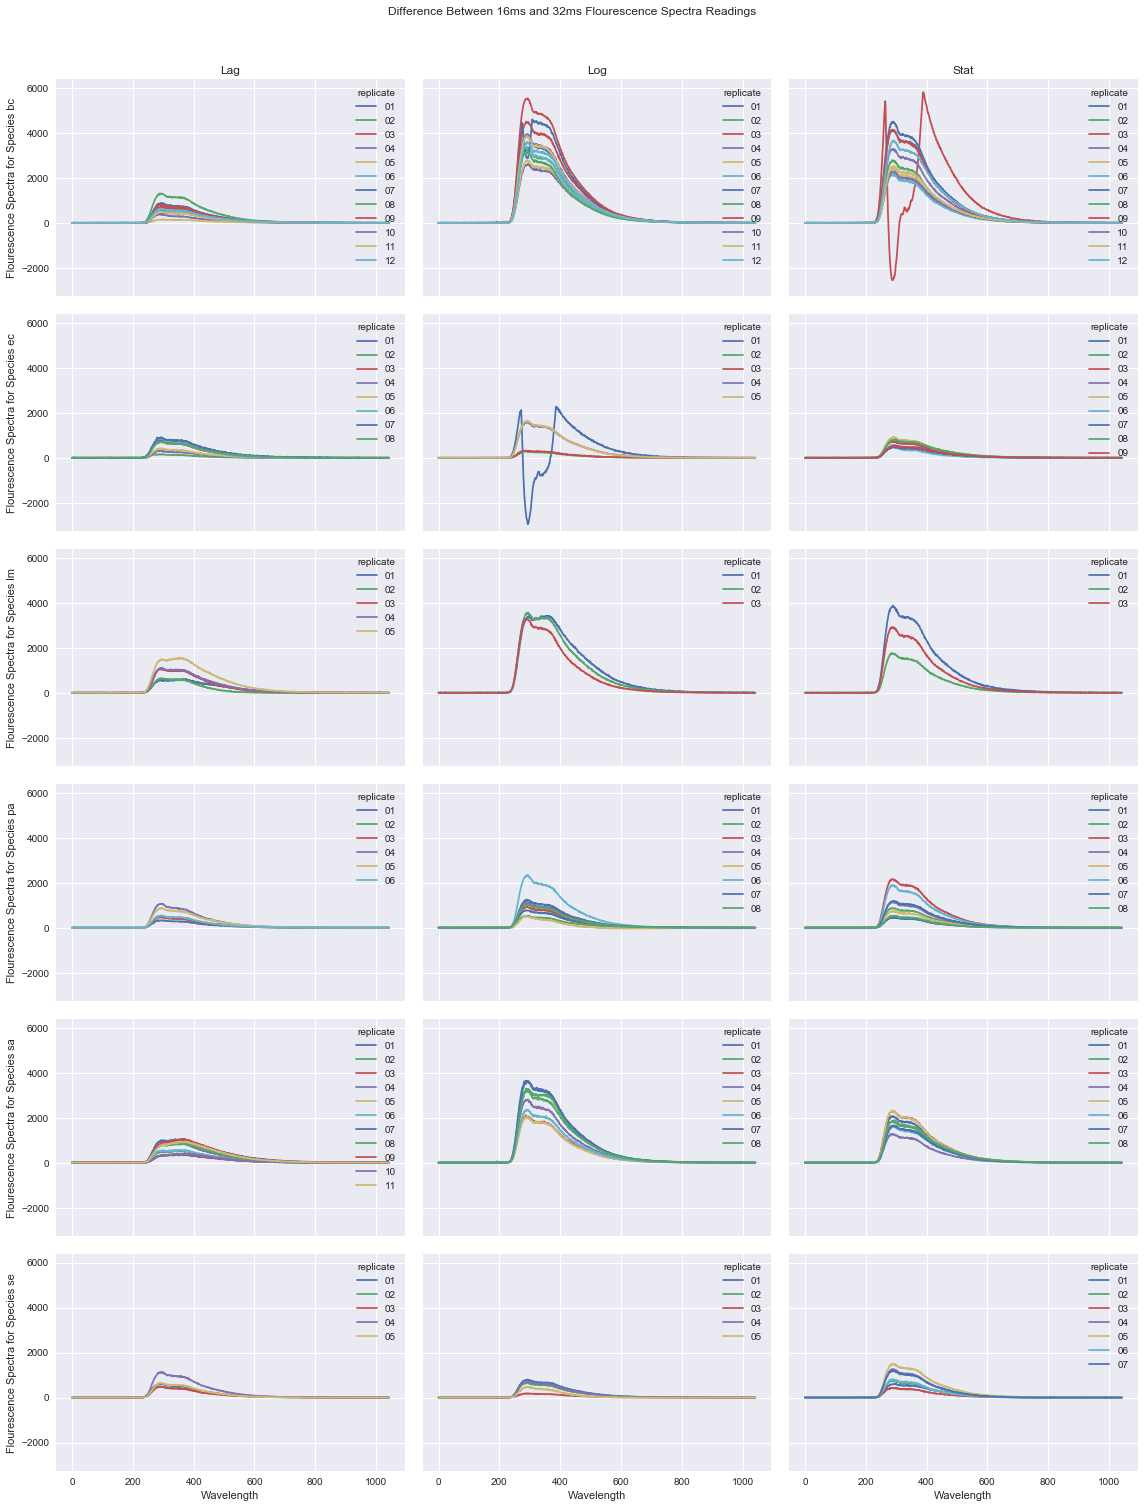

In [27]:
diff = df_32ms - df_16ms

fig = plt.figure(figsize=(16, 22))

grid = Grid(fig, rect=111, nrows_ncols=(len(species), len(growth_phases)),
            axes_pad=0.25, label_mode='L', 
            share_y=True)

y_min = diff.unstack().min() * 1.1
y_max = diff.unstack().max() * 1.1
ylim = (y_min, y_max)

growth_phase_i = 0
species_i = 0

for grid_axis in grid:
    growth_phase = growth_phases[growth_phase_i]
    s = species[species_i]
    gramness = 'positive' if s in gram_pos else 'negative'
    
    df_axis = diff.loc(axis=1)[growth_phase, gramness, s].plot(ax=grid_axis, ylim=ylim)
    df_axis.set(xlabel='Wavelength', 
                ylabel='Flourescence Spectra for Species %s' % s
               )

    if species_i == 0:  # i.e. we are on the first row
        df_axis.set(title='%s' % growth_phase.capitalize())

    growth_phase_i += 1

    if growth_phase_i == len(growth_phases):
        growth_phase_i = 0
        species_i += 1

fig.suptitle('Difference Between 16ms and 32ms Flourescence Spectra Readings')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

It looks like the 32ms readings are generally just slightly amplified versions of the 16ms readings, with the exception of the bc log, bc stat, and ec log readings.